Three types of Machine Learning:
- Supervised Learning - there is a class label/target variable in the dataset 
- Unsupervised Learning - only set of features in the dataset. No class label/target variable in dataset. We try to understand the underlying structure in the data. Try to find the clusters and make useful predictions.
- Reinforcement Learning

K - free parameters
1. Take two random points (K centroids, in this example, k=2).
2. Draw a horizontal line connecting these two points. Draw a perpendicular line to this line. Now you have two imperfect clusters.
   Each side of the line is its own cluster.
3. Now you try to improve the position of these two centroids respectively by bringing each to a point closer to the cluster's data points/become the      center of gravity for given cluster.
4. Now repeat steps 2 and 3. Another perpendicular line, and recompute the distance of the data points to each cluster. Change the cluster which each      data point belongs to if needed.
5. Recompute the clusters and repeat this till the data points stop changing clusters.
6. Now you have two final clusters.

People may argue about the number of K. I.e, it should be 4 clusters instead of 2.
Method to find the optional K - Algo method.
1. Pick a K number. Say, 2.
2. Do all the steps mentioned above.
3. Calculate the SSE (sum of squared errors) for each cluster. Total the SSEs.
4. Now repeat steps 1 to 3 with different K numbers and plot a graph. X axis - K numbers, Y axis - SSE.

Naturally, as K increases, the SSE will drop. Imagine if we have 11 datapoints, and we take 11 clusters. SSE will be almost 0.

The BEST K would be the ELBOW of the graph!

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Files/K_Means_Clustering/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


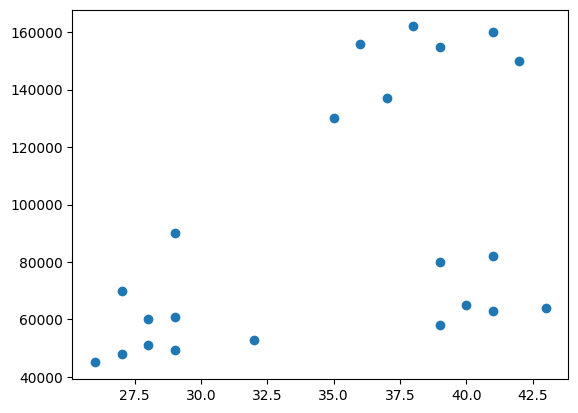

In [3]:
# plotting scatterplot to think of K
plt.scatter(df.Age,df['Income($)'])

In [4]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [8]:
# Not including the non-numerical column in fitting as it won't be applicable
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\Users\ACER\.conda\envs\condaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\.conda\envs\condaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [10]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0


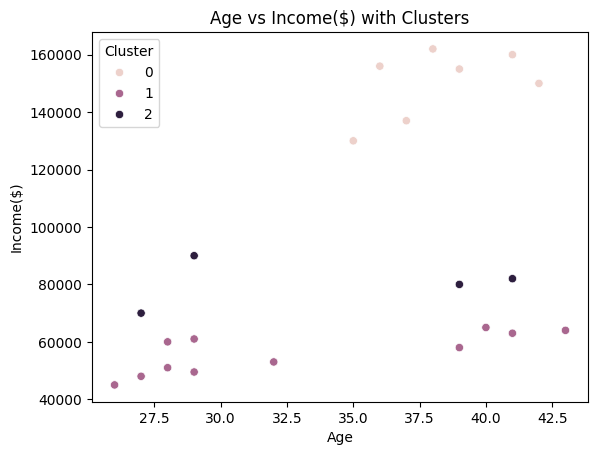

In [23]:
import seaborn as sns

# Scatter plot with Seaborn
sns.scatterplot(x=df['Age'], y=df['Income($)'], hue=df['cluster'])

# Add legend
plt.legend(title='Cluster')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Age vs Income($) with Clusters')

# Show the plot
plt.show()

# Clusters are not nice because we didn't scale the axis appropriately. So preprocessing needs to be done

In [36]:
# MinMaxScaler will try to make the scale from 0 to 1
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [39]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\Users\ACER\.conda\envs\condaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\.conda\envs\condaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [43]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [46]:
# these are our centroids, 3 of them! They mean x and y
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

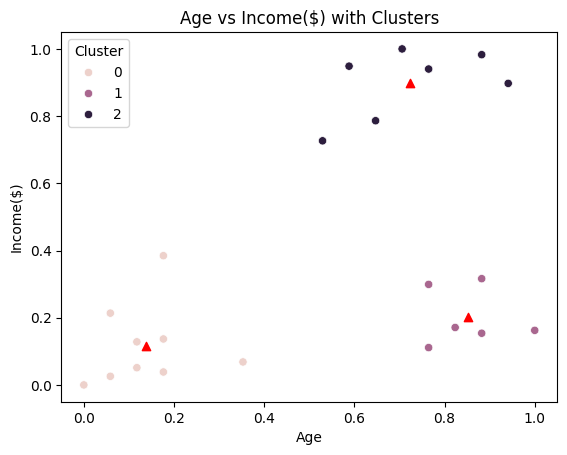

In [50]:
# Scatter plot with Seaborn
sns.scatterplot(x=df['Age'], y=df['Income($)'], hue=df['cluster'])

# Add legend
plt.legend(title='Cluster')

# Plotting centroids
plt.scatter(x=km.cluster_centers_[:,0],y=km.cluster_centers_[:,1],color='red',marker='^',label='centroid')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Age vs Income($) with Clusters')

# Show the plot
plt.show()

Now, Algo plot method. In the real world, you'll have 20 features etc.
So - 1) Select K ranges to be test. 2) Calculate all SSEs (this is the 'inertia_' property from KMeans() and plot. 3) Find elbow.

In [52]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\ACER\.conda\envs\condaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\.conda\envs\condaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ACER\.conda\envs\condaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\.conda\envs\condaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory 

In [53]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.2621792762345213,
 0.21055478995472487,
 0.16858512236029757,
 0.13265419827245162,
 0.10383752586603559]

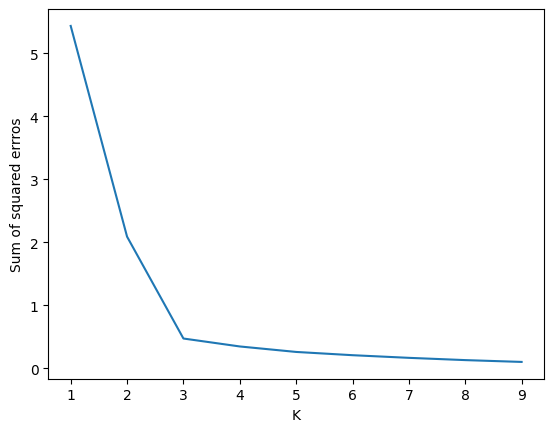

In [54]:
# now let's plot the SSE
plt.xlabel('K')
plt.ylabel('Sum of squared errros')
plt.plot(k_rng,sse)